In [1]:
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import networkx as nx
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import igraph as ig
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from modutils import mod_calc
device = torch.device('cpu')

In [ ]:
G = nx.read_gml("datasets/lesmis.gml", label = 'id')
print(nx.info(G))
comm_dict = partition(G)
clusters_number = len(np.array(list(set(comm_dict.values())))) #set the number of clusters required here

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [3]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)  

In [4]:
class CDCGS(nn.Module):
    def __init__(self, A_hat, num_feat, num_hidden):
        super(CDCGS, self).__init__()
        self.num_feat = num_feat
        self.num_hidden = num_hidden
        self.A_hat = A_hat
        self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
        I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
        self.I = torch.tensor(I,dtype=torch.float)

    def forward(self, X, A_hat,temp):
        global featureSelector
        global weight_feature
        featureSelector = self.W_0
        results = torch.zeros(self.W_0.size())
        x = 500
        for i in range(x):
            results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
        weight_feature = results/x

        H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
        H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
        H = torch.div(H, H.sum(axis=0))
        m = nn.Softmax(dim=0)
        return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)


def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=1e-2,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)


A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)

loss_hist = []
acc_hist = []
temp = 3

for epoch in range(500):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.5
    elif(epoch == 100):
        temp = 2
    elif(epoch == 150):
        temp = 1.5
    elif(epoch == 200):
        temp = 1
    elif(epoch == 300):
        temp = 0.5
    elif(epoch == 400):
        temp = 0.1
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',epoch,loss)
    loss.backward()
    optimizer.step()


/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss 0 tensor(13.6214, grad_fn=<SumBackward0>)
loss 1 tensor(13.6214, grad_fn=<SumBackward0>)
loss 2 tensor(13.6214, grad_fn=<SumBackward0>)
loss 3 tensor(13.6214, grad_fn=<SumBackward0>)
loss 4 tensor(13.6214, grad_fn=<SumBackward0>)
loss 5 tensor(13.6213, grad_fn=<SumBackward0>)
loss 6 tensor(13.6212, grad_fn=<SumBackward0>)
loss 7 tensor(13.6212, grad_fn=<SumBackward0>)
loss 8 tensor(13.6211, grad_fn=<SumBackward0>)
loss 9 tensor(13.6210, grad_fn=<SumBackward0>)
loss 10 tensor(13.6209, grad_fn=<SumBackward0>)
loss 11 tensor(13.6207, grad_fn=<SumBackward0>)
loss 12 tensor(13.6205, grad_fn=<SumBackward0>)
loss 13 tensor(13.6203, grad_fn=<SumBackward0>)
loss 14 tensor(13.6200, grad_fn=<SumBackward0>)
loss 15 tensor(13.6194, grad_fn=<SumBackward0>)
loss 16 tensor(13.6192, grad_fn=<SumBackward0>)
loss 17 tensor(13.6185, grad_fn=<SumBackward0>)
loss 18 tensor(13.6184, grad_fn=<SumBackward0>)
loss 19 tensor(13.6178, grad_fn=<SumBackward0>)
loss 20 tensor(13.6172, grad_fn=<SumBackward0>)
lo

loss 171 tensor(12.4972, grad_fn=<SumBackward0>)
loss 172 tensor(12.4878, grad_fn=<SumBackward0>)
loss 173 tensor(12.4792, grad_fn=<SumBackward0>)
loss 174 tensor(12.4629, grad_fn=<SumBackward0>)
loss 175 tensor(12.4570, grad_fn=<SumBackward0>)
loss 176 tensor(12.4366, grad_fn=<SumBackward0>)
loss 177 tensor(12.4268, grad_fn=<SumBackward0>)
loss 178 tensor(12.4203, grad_fn=<SumBackward0>)
loss 179 tensor(12.4089, grad_fn=<SumBackward0>)
loss 180 tensor(12.3942, grad_fn=<SumBackward0>)
loss 181 tensor(12.3844, grad_fn=<SumBackward0>)
loss 182 tensor(12.3713, grad_fn=<SumBackward0>)
loss 183 tensor(12.3658, grad_fn=<SumBackward0>)
loss 184 tensor(12.3482, grad_fn=<SumBackward0>)
loss 185 tensor(12.3336, grad_fn=<SumBackward0>)
loss 186 tensor(12.3228, grad_fn=<SumBackward0>)
loss 187 tensor(12.3084, grad_fn=<SumBackward0>)
loss 188 tensor(12.2953, grad_fn=<SumBackward0>)
loss 189 tensor(12.2889, grad_fn=<SumBackward0>)
loss 190 tensor(12.2726, grad_fn=<SumBackward0>)
loss 191 tensor(12.2

loss 339 tensor(10.4855, grad_fn=<SumBackward0>)
loss 340 tensor(10.4835, grad_fn=<SumBackward0>)
loss 341 tensor(10.4837, grad_fn=<SumBackward0>)
loss 342 tensor(10.4821, grad_fn=<SumBackward0>)
loss 343 tensor(10.4782, grad_fn=<SumBackward0>)
loss 344 tensor(10.4740, grad_fn=<SumBackward0>)
loss 345 tensor(10.4832, grad_fn=<SumBackward0>)
loss 346 tensor(10.4784, grad_fn=<SumBackward0>)
loss 347 tensor(10.4763, grad_fn=<SumBackward0>)
loss 348 tensor(10.4757, grad_fn=<SumBackward0>)
loss 349 tensor(10.4765, grad_fn=<SumBackward0>)
loss 350 tensor(10.4681, grad_fn=<SumBackward0>)
loss 351 tensor(10.4679, grad_fn=<SumBackward0>)
loss 352 tensor(10.4691, grad_fn=<SumBackward0>)
loss 353 tensor(10.4706, grad_fn=<SumBackward0>)
loss 354 tensor(10.4678, grad_fn=<SumBackward0>)
loss 355 tensor(10.4645, grad_fn=<SumBackward0>)
loss 356 tensor(10.4638, grad_fn=<SumBackward0>)
loss 357 tensor(10.4563, grad_fn=<SumBackward0>)
loss 358 tensor(10.4559, grad_fn=<SumBackward0>)
loss 359 tensor(10.4

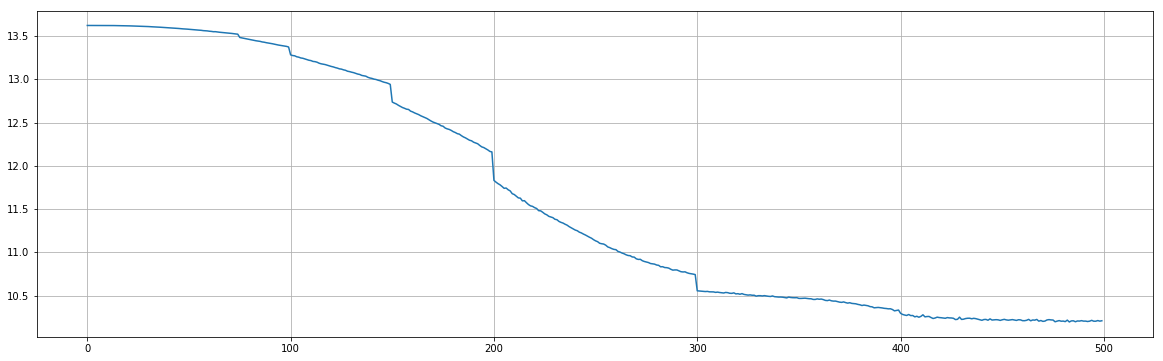

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

In [6]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_pred = gumbel_matrix.data.numpy()

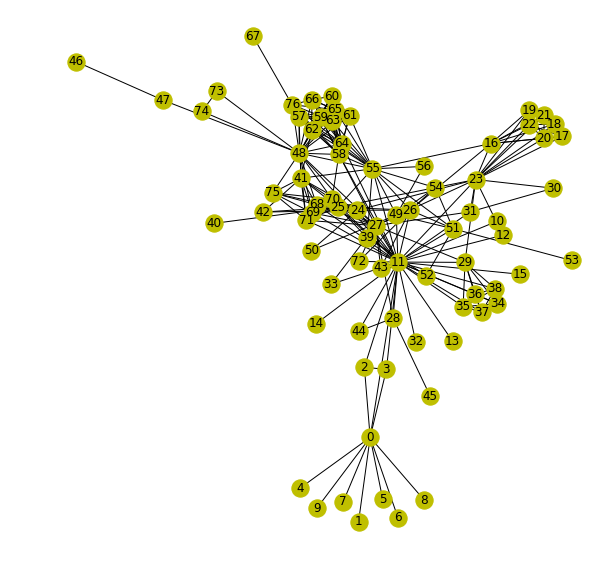

Modularity for Lesmis dataset is 0.54109


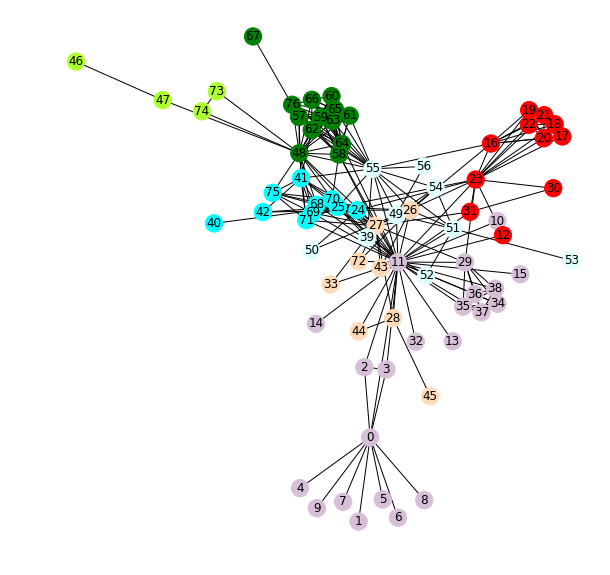

In [12]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G, pos=pos,node_color="y", node_size=300, with_labels=True)
plt.show()
print('Modularity for Lesmis dataset is %.5f' %mod_calc(G,'lesmis',labels_pred))

color = []
for c in range(len(gumbel_matrix)):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('peachpuff')
    elif(gumbel_matrix[c] == 3):
        color.append('greenyellow')
    elif(gumbel_matrix[c] == 4):
        color.append('aqua')
    elif(gumbel_matrix[c] == 5):
        color.append('lightcyan')
    elif(gumbel_matrix[c] == 6):
        color.append('thistle')
    elif(gumbel_matrix[c] == 7):
        color.append('gold')
    elif(gumbel_matrix[c] == 8):
        color.append('m')
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=300, node_color=color, with_labels=True)
plt.show()
